## Unsupervised Learning in Python

### CHAPTER 1. Clustering for data analysis

#### 1.1 Unsupervised learning

* Unsupervised learning finds patterns in data
* Examples: clustering, dimension reduction

* Supervised VS. unsupervised learning
    * Supervised learning finds pattern for a prediction task with labeled data
    * Unsupervised learning finds pattern in data (purely discovery) without labels
    
* k-means clustering:
    * Finds clusters of samples
    * Number of clusters must be specified
    * New samples can be assigned to existing clusters
    * k-means remembers the mean of each cluster (centroids) and finds the nearest centroid to each new sample 

In [1]:
# k-means in scikit-learn
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

# get iris data
iris = datasets.load_iris()
samples = iris.data

# create k-means model
model = KMeans(n_clusters=3)
model.fit(samples)
labels = model.predict(samples)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [2]:
# cluster labels for new samples
new_samples = [[5.0, 3.3, 1.4, 0.2],
              [5.0, 3.5, 1.3, 0.3],
              [7.2, 3.2, 6.0, 1.8]]
new_labels = model.predict(new_samples)
print(new_labels)

[1 1 2]


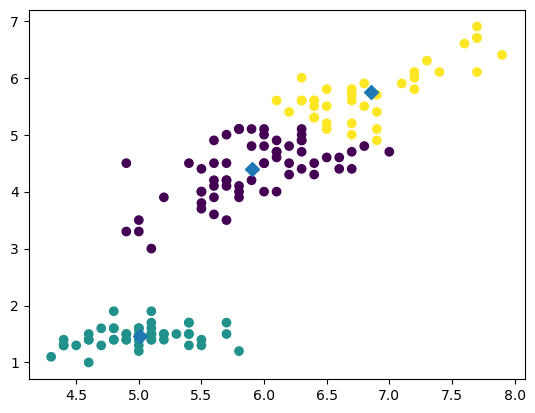

In [3]:
# visualize clusters by scatter plots
import matplotlib.pyplot as plt
xs = samples[:, 0]
ys = samples[:, 2]
plt.scatter(xs, ys, c=labels)

centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 2]
plt.scatter(centroids_x, centroids_y, marker='D', s=50)

plt.show()

#### 1.2 Evaluating a clustering

* Can check correpondence with labels (e.g: iris species)
    * Clusters VS. species is a "cross-tabulation"
* Measure quality of clustering
    * A good clustering has tight clusters
    * Samples in each cluster bunched together
    * **Inertia** measures how spread out the clusters are (*lower* is better)
* Informs choice of how many clusters to look for 
    * A good clustering has tight clusters (so low inertia)
    * ... but not too many clusters!
    * Need to make a trade-off!
    * Choose an **"elbow"** in the inertia plot


In [4]:
# cross tabulation with pandas
import pandas as pd
species = iris.target
df = pd.DataFrame({'labels': labels, 'species': species})
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species   0   1   2
labels             
0         0  48  14
1        50   0   0
2         0   2  36


In [5]:
# inertia in scikit-learn
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(samples)
print(model.inertia_)

78.85144142614601


E:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


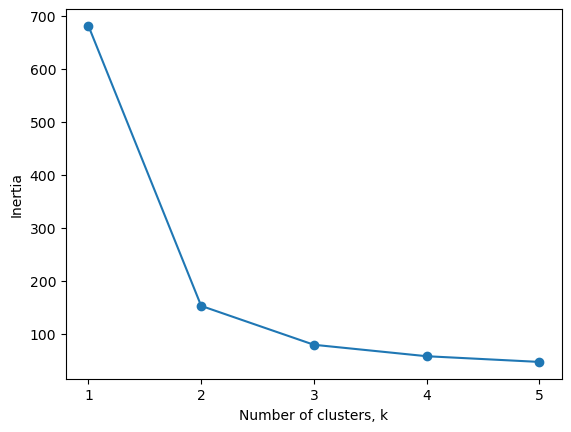

In [6]:
# inertia plot in python
import matplotlib.pyplot as plt
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()
# it looks like 3 is a good choice

#### 1.3 Transforming features for better clustering

* In kmeans, feature variance = feature influence
* Data needs to be transformed so features have equal variance
* **StandardScaler** can transform each feature to have mean 0 and variance 1
* In this way, feature are **"standardized"**
* Other similar methods include: **MaxAbsScaler** and **Normalizer**

In [7]:
# clustering the wines
import pandas as pd
from sklearn.cluster import KMeans
wine_df = pd.read_csv('2_datasets/wine.csv')
samples = wine_df.drop(['class_label', 'class_name'], axis=1).values
model = KMeans(n_clusters=3)
labels = model.fit_predict(samples)

In [8]:
# clusters VS. varieries
varieties = wine_df['class_name'].values
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
# things don't work out so well this time

varieties  Barbera  Barolo  Grignolino
labels                                
0                0      46           1
1               19       0          50
2               29      13          20


In [9]:
# StandardScaler in scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

In [10]:
# two steps pipeline for StandardScaler and KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)
labels = pipeline.predict(samples)

# check new crosstab after standardization
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)
# the result is much better this time

varieties  Barbera  Barolo  Grignolino
labels                                
0               48       0           3
1                0      59           3
2                0       0          65


### CHAPTER 2. Visualization with hierarchical clustering and t-SNE

#### 2.1 Visualizing hierarchies

*